Introduction
============

Sequences
---------

The concept of a sequence is nothing but a collection of numbers with a specific order.

$x_0, x_1, x_2, ..., x_n, ...$


For example, the sequence of all odd number is:

$1, 3, 5, 7, ..., 2n+1, ...$


Notice that we have an explicit formula for the n-th term: $2n + 1$.  $n$ takes on the values $0, 1, 2, ... \infty$ So the 0-th term in the sequence of odd numbers is $2\times0 + 1 = 1$ the next is $2\times1 + 1 = 3$, etc. If you've ever taken a course in discrete mathematics, you might have seen sequences such as this written using the following notation:

$(x_n)_{n=0}^\infty, x_n = 2n + 1$

In english, we would read this as: x is a sequence ranging from n equals 0 to infinity, such that the nth value of x is equal
to 2 times n plus 1.

Some other examples of infinite squences; the sequence of the squares of the whole integers, and the sequence of the fractions of the whole integers:

$1, 4, 9, 16, 25, ..., (n+1)^2, ... \quad \quad (x_n)_{n=0}^\infty, x_n = (n + 1)^2$

$1, \frac{1}{2}, \frac{1}{3}, \frac{1}{4}, ..., \frac{1}{n+1}, ...\quad \quad (x_n)_{n=0}^\infty, x_n = \frac{1}{n+1}$

These sequences are infinite.  They are generated from all integers $\ge 0$ and there are infinitely many such integers.


Finite Sequences
-----------------

Most sequences of real-life interest will be finite.  Especially in computational modeling where, unless we 
have a truly infinite tape on a real Turing machine, of necessity we will be working with finite ranges of 
sequences.  An example, if you put an amount $x_0$ of money in a bank, you will accrue interest at some 
interest rate.  You will therefore have $x_1$ amount after one year, $x_2$ after two years, and so on up 
to $x_T$ after $T$ years.  We can describe this finite sequence in basically the same way as before, but 
using a finite bound $T$:

$x_0, x_1, x_2, ..., x_T \quad \quad (x_t)_{t=0}^T$


Recurrence Relations
--------------------

In the previous example of compound interest, it is easy to state what $x_1$ should be, the amount of money in the 
account after 1 year.  Assuming we compound interest annually (every year) at some interest rate $r$, 
and we assume no additional deposits or withdrawls, we know that the amount of money in the account 
at $x_1$ should be:

$x_1 = x_0 + r \cdot x_0$

or in english, the amount of money will be what we originally started with, plus some percentage (the banks 
interest rate) of that amount added back into our account.  Here r represents the interest rate as a ratio in 
the range $[0.0, 1.0]$

The prevous is an example of what is known as a recurrence relation, also called a difference 
equation. In general, easy sequences, such as the sequence of odd integers, can always also be 
expresed alternatively as recurrence relations:

$x_{n+1} = x_n + 2 \quad x_0 = 1$

So the sequence of odd numbers we defined previously can be represented as this recurrence relation, where 
the initial condition $x_0$ is 1, and each value in the sequence after that can be found from some 
relationship to the previous value in the sequence.  Astute students at this point may notice that there 
is a natural mapping between a recurrence relationship and an implementation as a recursive function 
(see the Fibonnaci recursive function example below).

Returning back to our interest rate example, in that case it is harder to write an equation for the amount 
in the bank at time $T$ years, though not that hard, the equation is:

$x_t = x_0 ( 1 + r)^T$

But some find the recurrence relationship easier to directly understand.  Equivalently we can write:

$x_t = x_{t-1} + r \cdot x_{t-1}$

factoring out we have: 

$x_t = x_{t-1} (1 + r) \quad x_0 = \textrm{initial deposit amount}$


Solving difference equations can be quite challenging analytically in mathematics, but they are almost trivial 
to solve empirically on a computer.  That is why difference equations are so well suited for computer programming.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

The Fibonnaci Sequence as a Difference Equation
--------------------------------------

Most of you, I am sure, have run across the [Fibonacci Sequence](https://en.wikipedia.org/wiki/Fibonacci_number) of Numbers at some point.  Fibonacci numbers are actually another example of an infinite sequence:

$1, 1, 2, 3, 5, 8, 13, ...$

The equation for the n-th Fibonnaci number is a bit tricky to derive, but it is trivial to express this 
sequence as a difference equation:

$x_n = x_{n-1} + x_{n-2}, \quad \quad x_0 = 1, x_1 = 1$

As can be seen from this example, a recurrence relation can be more complicated than just an expression 
only involving the most recent previous value.  Here the n-th value is a (simple) expression of the previous 
two values in the sequence.

Fibonnaci numbers are sometimes used as a first example in a course introducing recursion.  We can write a 
recursive function to calculate the n-th Fibonnaci number in Python almost directly from the difference equation:

In [2]:
def nth_fibonnaci(N):
    """Example of a recursive implementation to generate the N-th Fibonnaci number"""
    # the initial conditions of a recurrence relation basically correspond to the
    # base case(s) or stopping conditions of our recursive function implementation
    # The Fibonnaci sequence has 2 base cases, at n=0 and n=1
    if N==0:
        return 1
    elif N==1:
        return 1
    # otherwise we return the sum of the previous two terms in the sequence
    else:
        return nth_fibonnaci(N-1) + nth_fibonnaci(N-2)

In [3]:
print( "x_0 = %d" % nth_fibonnaci(0) ) 
print( "x_1 = %d" % nth_fibonnaci(1) ) 
print( "x_2 = %d" % nth_fibonnaci(2) ) 
print( "x_6 = %d" % nth_fibonnaci(6) ) 
print( "x_10 = %d" % nth_fibonnaci(10) ) 

x_0 = 1
x_1 = 1
x_2 = 2
x_6 = 13
x_10 = 89


The previous implementation is pretty inefficient as it ends up calculating many of the numbers many, many times redundantly.  But it does work.

An alternative thing we might want to do is to generate all of the numbers in the Fibonnaci sequence up to some point N.
We can do this easily using an iterative (looping) implementation:

In [4]:
def generate_fibonnaci_sequence(N):
    """Return the sequence of Fibonnaci numbers up the the Nth number in the sequence"""
    # N = 0
    x = [1]
    if N == 0:
        return x
    
    # N = 1
    x.append(1)
    if N == 1:
        return x
    
    # N = 2 or higher
    for n in range(2, N+1):
        x_next = x[-1] + x[-2]
        x.append(x_next)
    return x
        

In [5]:
generate_fibonnaci_sequence(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [6]:
print( generate_fibonnaci_sequence(10) ) 
# the Fibonnaci sequence grows fast, Python can detect and start using big integers to represent...
for i,x in enumerate(generate_fibonnaci_sequence(250)):
    print( "x_%d = %d" % (i, x) ) 

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
x_0 = 1
x_1 = 1
x_2 = 2
x_3 = 3
x_4 = 5
x_5 = 8
x_6 = 13
x_7 = 21
x_8 = 34
x_9 = 55
x_10 = 89
x_11 = 144
x_12 = 233
x_13 = 377
x_14 = 610
x_15 = 987
x_16 = 1597
x_17 = 2584
x_18 = 4181
x_19 = 6765
x_20 = 10946
x_21 = 17711
x_22 = 28657
x_23 = 46368
x_24 = 75025
x_25 = 121393
x_26 = 196418
x_27 = 317811
x_28 = 514229
x_29 = 832040
x_30 = 1346269
x_31 = 2178309
x_32 = 3524578
x_33 = 5702887
x_34 = 9227465
x_35 = 14930352
x_36 = 24157817
x_37 = 39088169
x_38 = 63245986
x_39 = 102334155
x_40 = 165580141
x_41 = 267914296
x_42 = 433494437
x_43 = 701408733
x_44 = 1134903170
x_45 = 1836311903
x_46 = 2971215073
x_47 = 4807526976
x_48 = 7778742049
x_49 = 12586269025
x_50 = 20365011074
x_51 = 32951280099
x_52 = 53316291173
x_53 = 86267571272
x_54 = 139583862445
x_55 = 225851433717
x_56 = 365435296162
x_57 = 591286729879
x_58 = 956722026041
x_59 = 1548008755920
x_60 = 2504730781961
x_61 = 4052739537881
x_62 = 6557470319842
x_63 = 10610209857723
x_64 = 1716768

As the second example shows, the Fibonnaci sequence grows very quickly.  In fact the Fibonnaci sequence is an example 
of exponential growth, and was discovered by Fibonnaci when he developed it to describe the exponential population 
growth of rabbit populations.

The iterative solution shown above illustrates a few conventions that should help to translate more easily from the 
recurrence relation equation to Python code.  Note that I named the list `x`, and that `x[i]` values should 
correspond to the $x_i$ in the recurrence relationship.  And because of Python negative indexing, we can 
refer to $x_{n-1}, x_{n-2}$ as the x array values `x[-1]` and `x[-2]` respectively, using negative indexing
to access the previous 2 end values in the sequence/list. We will use these conventions in the following 
examples in order to make translation from the mathematical recurrence relation into Python code more direct 
and easy to understand.

Population Growth as a Recurrence Relationship
----------------------------------------------

The Fibonnaci recurrence relation was inspired by observing exponential growth patterns 
in a biological population.  Biological populations grow exponentially because each generation gives birth 
to offspring, which can then have offspring, etc.  So for example, lets think of the case of abiogenesis of 
a bacteria, that reproduces by splitting itself.  Each splitting represents a doubling of the population 
size in that generation, thus from one bacteria, we have the sequence:

$1, 2, 4, 8, 16, 32, ...$

(1 begats 2, 2 begats 4, etc.)  This is an exponential sequence, because it is 2 raised to an exponent:

$(x_t)_{t=0}^\infty, \quad x_t = 2^t$

**EXERCISE**: Express the doubling sequence as a difference equation.

Let $x_{t}$ be the number of individuals in a population at time $t$.  The population 
can consist of humans, animals, cells, or whatever objects where the number of 
births and deaths is proportional to the number of individuals 
currently in the population.  When we say proportional, we mean that between time $t-1$ 
and time $t$, we will see $b x_{t-1}$ individuals are born and $d x_{t-1}$ individuals die. Here b 
and d are constant ratios again with values in the range of $[0.0, 1.0]$.  The net growth 
in the population at time $t$ is therefore going to be the difference between 
the number of individuals born, and the number of individuals that die:

$ growth_{t} = b x_{t-1} - d x_{t-1} $

we can factor the equation and come up with the population growth at the next time step as:

$ growth_{t} = (b - d) x_{t-1} $

Since $b$ and $d$ are constants, we can introduce another constant, $r$, defined as 
the growth rate, basically the difference between births and deaths

$ r = (b - d) $

Which lets us write a recurrence relationship for population growth, that is 
basically the same one that we came up with for the compound interest rate 
example.  Here the rate variable $r$ represents the growth rate of the population
(or if deaths are greater than births then $r$ will be negative and it
represents the decay rate of the population).  Since $b$ and $d$ were ratios
with values in the range of $[0.0, 1.0]$, r is also a ratio, though it can 
range from $[-1.0, 1.0]$.  Here is the recurrence relationship for population
growth, using the defined $r$ growth rate ratio:

$x_t = x_{t-1} + r \cdot x_{t-1}  \quad \quad \equiv \quad \quad x_t = x_{t-1} ( 1 + r ) $

This final form of the growth rate difference equation is still exponential.  It can model 
births and deaths, and it can model a population where births are greater than deaths, 
or where births are less than deaths.  But it still does not have any limiting factors. 

Lets look at two examples of population growth or decay using this recurrence relation. In 
the first we will simulate population size for 1000 time steps.  We will start with 
a beginning population of 10 individuals, with a birth rate of 5% ($0.05$) and a death 
rate of 2% ($0.02$). 

Final population size: 66740196419122


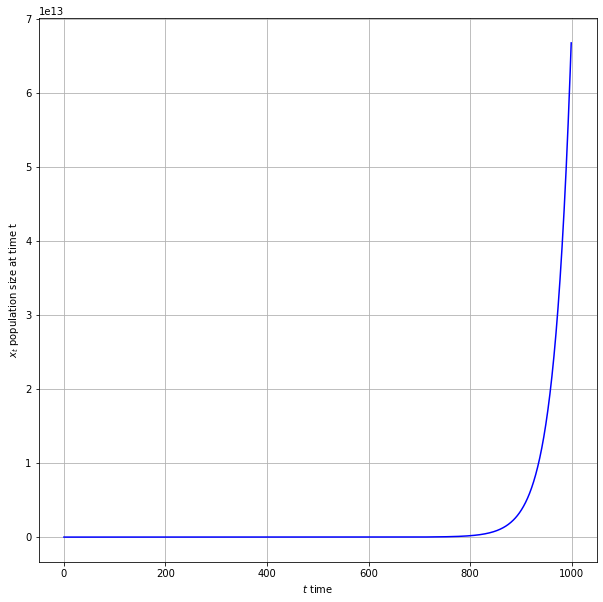

In [7]:
TIME = 1000 # we will simulate 1000 time steps of population growth/decay
x = np.zeros(TIME) # hold population size x at time t x[t]
x[0] = 10 # population has 10 individuals at t = 0, which is x_0
b = 0.05 # 5 percent birth rate
d = 0.02 # 2 percent death rate
r = (b - d) # growth rate

for t in range(1, TIME):
    x[t] = x[t-1] * (1 + r)

plt.figure(figsize=(10,10))
plt.plot(range(TIME), x, 'b-')
plt.xlabel('$t$ time')
plt.ylabel('$x_t$ population size at time t')
plt.grid()

print( "Final population size: %d" % x[-1] ) 

The population size increases relatively slowly until after time 800 or so.  Its actually not that 
slow, but in relation to the growth rate after the bend in the curve it is hard to see.  (Exercise: try plotting the
results for only T=0 to 300.  Now what do you think of the growth rate for times < 800?).  Notice 
that from the initial population of 10 individuals, we end up with $6.6 \times 10^{13}$ individuals in 
the population (66 trillon).  The earth currently has around 6 billion humans on it $6\times 10^9$, for comparision. 
This is typical of an exponential relationship.  Lets replot the above results, using a log
scale on the y axis.  A log scale will help us to better see the growth rate in all parts of the figure.

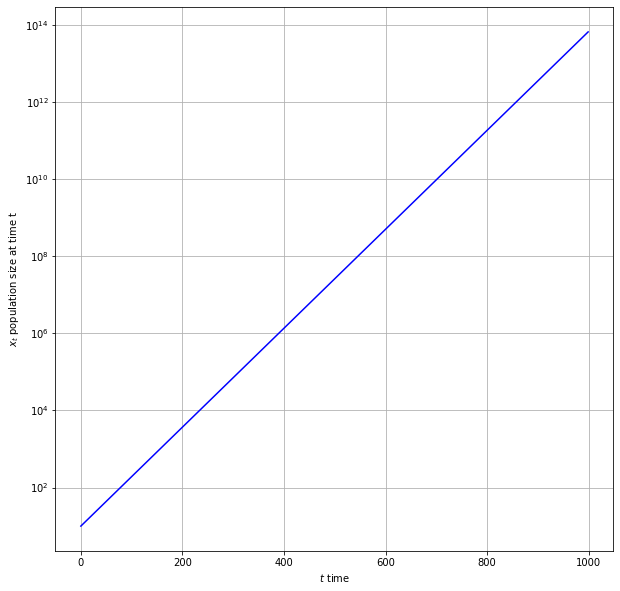

In [8]:
plt.figure(figsize=(10,10))
plt.plot(range(TIME), x, 'b-')
plt.yscale('log')
plt.xlabel('$t$ time')
plt.ylabel('$x_t$ population size at time t')
plt.grid();

Seeing a straight line when one or both axis have been scaled using logarithmic scaling is 
indicitative of an exponential relationship.

Lets look at another example where the death rate is higher than the birth rate.  In such a case 
we will see exponential decay, or a rapid collapse of the population size. Lets start with an initial population
of 6 billion, and see what happens if we have a very slight decay rate.

Final population size:  40124433.64119791


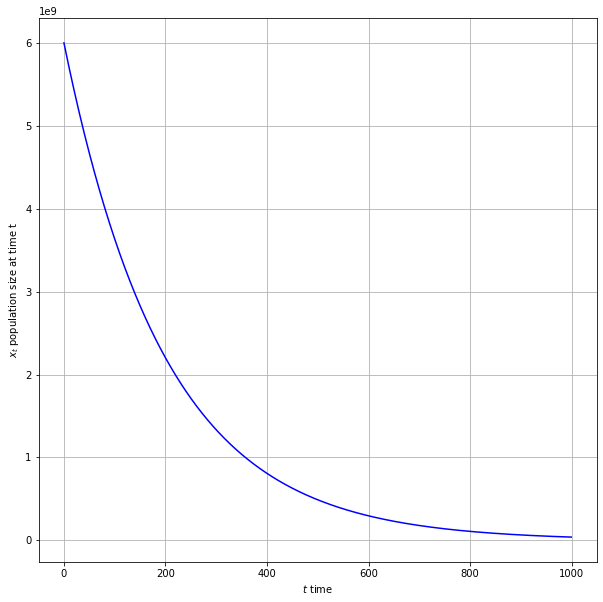

In [9]:
TIME = 1000 # we will simulate 1000 time steps of population growth/decay
x = np.zeros(TIME) # hold population at x at time t x[t]
x[0] = 6e9 # population has x_0 = 6 billion individuals at t = 0
b = 0.05 # 5 percent birth rate
d = 0.055 # 5.5 percent death rate
r = (b - d) # growth rate

for t in range(1, TIME):
    x[t] = x[t-1] * (1 + r)

plt.figure(figsize=(10,10))
plt.plot(range(TIME), x, 'b-')
plt.xlabel('$t$ time')
plt.ylabel('$x_t$ population size at time t')
plt.grid()

print( "Final population size: ", x[-1] ) 

And we will plot once again using logarithmic scaling on the y axis.

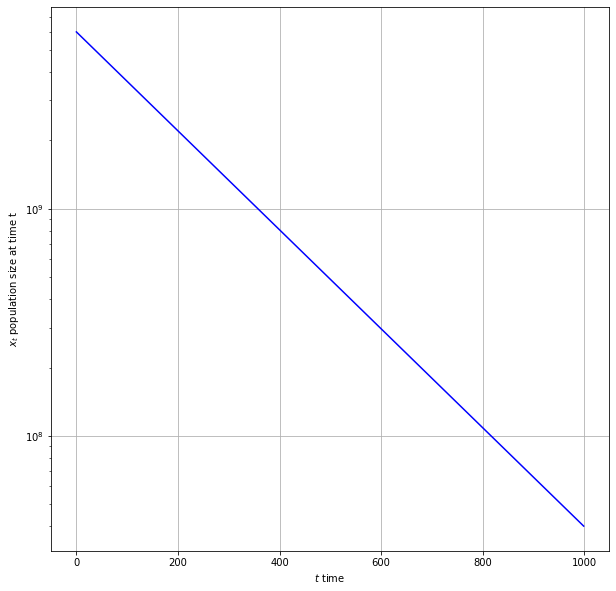

In [10]:
plt.figure(figsize=(10,10))
plt.plot(range(TIME), x, 'b-')
plt.yscale('log')
plt.xlabel('$t$ time')
plt.ylabel('$x_t$ population size at time t')
plt.grid();

This decay rate represents a deficit in births to deaths of .5 percent.  If these represented annual 
birth/death rates, this model indicates that after 1000 years, the population would plummet from 6 
billion individuals to only 40 million individuals.  This is one of the reasons why just very small 
adjustments in the ratio of biths to deaths in a population can quickly have very significant impacts 
on the population.

Logistic Growth
---------------

The major deficiency with our previous recurrence relationship is that we have no terms that represent 
limits to the population growth.  Populations are often limited in their growth by environmental
constraints.  Only so large of a population can be supported by the energy and food resources that
the environment can sustainably produce.  Or when you have competiting populations, such as predator
populations and prey populations, they can act as limits on one another to the populations
growth.

In real life there is an upper limit M of the number of individuals that can exist in the 
envrionment at the same time.  Lack of space and food, competition between individuals, 
predators, and spreading of contagious diseases are examples of factors that limit the
growth.  The number M is usually called the carrying capacity of the environment,
the maximum population which is sustainable over time.  With limited growth, the growth
factor $r$ must depend on time:

$ x_t = x_{t-1} + r(x_{t-1}) \cdot x_{t-1} $

Here $r(x)$ is going to be a function that gives what the growth rate ratio is as a function of the current population
size $x$.  For typical real populations in an environment with a carrying capacity M, the $r(x)$ will be a function that tends
towards 0 as the population size $x_t$ approaches M.  A simple example of such a function with these 
properties is:

$r(x) = \varrho (1 - \frac{x}{M} )$

Here, as the population size $x_t$ approaches $M$, the fraction comes closer to $1$, and 
therefore the expression in the parentheses approaches $0$.  But when the population
size $x_t$ is small, the function will be close to the constate $\varrho$ (rho).  $\varrho$
is again a constat ratio, in the range from $[-1.0, 1.0]$

**Exercise**: create a function that implements the $r(x)$ relationship.  Graph the function for a carrying capacity of 
$M = 1\times10^{6}$ over the whole range of populations $0$ to $10^6$.  Are you convinced that the
function $r(x)$ tends towards 0 as the population approaches the carrying capacity $M$?


Notice that only the first equation is a recurrence relationship, relating a value
at time $t$ to some relationship of the values in a previous time step.  The function for
$r(x)$, the growth rate, is a regular function that tells us what the value of r should be 
at any given time given the size of the population (and how close it is to the carrying capacity of the
environment).  Given the  recurrence relationship and our function for the growth rate, we can use these
to model  populations of logistic growth, where there are limiting factors to the populations
unconstrained growth.

Lets do an example with an initial population of 2 organisms, in an environment
with a carrying capacity of $M=10,000$, and the parameter $\varrho=0.04$ set to a growth rate
of 4% when limiting effects of the carrying capacity of the environment are not a factor.

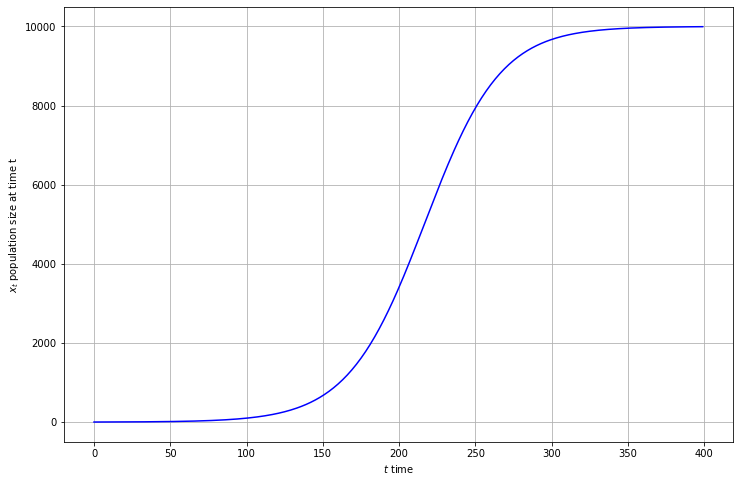

In [11]:
TIME = 400 # we will simulate 400 time steps of population growth/decay
x = np.zeros(TIME) # hold population at x at time t x[t]
x[0] = 2 # population has 2 individuals at t_0
M = 10000 # carrying capacity of the environment
rho = 0.04 # the rho constant for our logistic growth rate function

for t in range(1, TIME):
    # first calculate growth rate for this time step
    r = rho * (1 - (x[t-1] / M))
    x[t] = x[t-1] + r * x[t-1]

plt.figure(figsize=(12,8))
plt.plot(range(TIME), x, 'b-')
plt.xlabel('$t$ time')
plt.ylabel('$x_t$ population size at time t')
plt.grid();

As you should see, such modified population growth models show exponential growth when far away from the carrying capacity
$M$ of the environment.  But as they approach the limit they are slowed down by the logistic growth rate function.

# Versions

In [12]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.7.0
OS Linux 4.15.0 62 generic x86_64 with debian buster sid
numpy 1.16.4
scipy 1.3.1
matplotlib 3.1.1
Mon Sep 16 08:59:03 2019 CDT

# Acknowledgements

Materials and discussion for this notebook were based on Chapter 5 of Langtangen (2009). "A Primer on Scientific Programming with Python", Springer-Verlag.